
# Intial setup

Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 08 Sep 2020

This notebook uses historic data on GHG emissions, wholesale prices and tariffs to validate simulation results for this outputs using certain input settings. 
The validation is performed with available data from the official start of the easter market in Australia in 1999.
Data sources, wrangling exercises and assumptions are commented throughout the notebook.

In [1]:
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

import statistics
import datetime as DT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid") 

import os
import glob
import numpy as np
import pandas as pd
import os
import glob



## Load BAU results
The model has two types of results reporting: Full and Light. It also provide results summarised by month and by year. Their used will depend on the type of validation. For instance, wholesale prices can be found in a monthly basis since April 2005. Therefore, monthly results on simulated wholesale prices are used in this case. Even though emissions can be reported for every month (and even every 30 min if needed), greenhouse gas emissions are usually presented in a yearly basis therefore, if further granularity is not needed, annual simulations results are used in this case.

NB! files for BAU to make validation should have the same seed.


In [18]:
# yearly_bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_seed_1603107505299.csv', index_col='Time (Year)')
# monthly_bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataMonthlySummary_seed_1603107505299.csv', index_col='Time (Month)')

yearly_bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_seed_1603516037749.csv', index_col='Time (Year)')
monthly_bau_results_df  = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataMonthlySummary_seed_1603516037749.csv', index_col='Time (Month)')
vicFuture_yearly_bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_seed_1603516795434.csv', index_col='Time (Year)')
vicFuture_monthly_bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataMonthlySummary_seed_1603516795434.csv', index_col='Time (Month)')


In [19]:
yearly_bau_results_df.tail()

,Consumption (KWh) per household,Avg Tariff (c/KWh) per household,Wholesale ($/MWh),GHG Emissions (tCO2-e) per household,Number of Domestic Consumers (households),Percentage Renewable Production,System Production Primary Spot,System Production Secondary Spot,System Production Off Spot,System Production Rooftop PV,...,285000 - Battery - Gannawarra Energy Storage System - 25.33 - S - 2020 - 2033 - OffSpot,293000 - Wind - Berrybank Wind Farm - 180.6 - SS - 2020 - 2050 - Primary,295000 - Wind - Moorabool Wind Farm - 320.32 - SS - 2020 - 2044 - Primary,297000 - Wind - Stockyard Hill Wind Farm - 531.93 - SS - 2020 - 2045 - Primary,301000 - Wind - Cherry Tree Wind Farm - 57.6 - SS - 2020 - 2050 - Primary,303000 - Solar - Carwarp Solar Farm - Stage I - 100.0 - SS - 2020 - 2050 - Primary,305000 - Wind - Dundonnell Wind Farm - 336.0 - SS - 2020 - 2045 - Primary,308000 - Wind - Mortlake South Wind Farm - 157.5 - SS - 2020 - 2050 - Primary,317000 - Solar - Winton Asset Co. Pty Ltd as Trustee of the Winton Asset Trust - 85.0 - SS - 2021 - 2051 - Primary,331000 - Solar - Kiamal Solar Farm - Stage 2 - 149.96 - SS - 2022 - 2052 - Primary
Time (Year),,,,,,,,,,,,,,,,,,,,,
2046,4079.392508,37.510129,223.507534,2.487022,4062326.0,0.527068,3.607760e+07,0.0,9.393101e+06,8.237546e+06,...,0.0,770146.508970,0.0,0.0,245628.122462,113443.630435,0.0,671639.397358,99969.347852,181812.614333
2047,4075.921785,36.476403,223.025590,2.115587,4116155.0,0.600576,2.942615e+07,0.0,9.553394e+06,8.425261e+06,...,0.0,769493.954678,0.0,0.0,245419.998834,115105.279488,0.0,671070.309312,101332.399290,184831.537678
2048,4084.821008,35.560800,224.445581,0.297618,4169984.0,0.922807,1.507816e+07,0.0,9.356911e+06,8.433620e+06,...,0.0,774310.590090,0.0,0.0,246956.201490,117868.296454,0.0,675270.863450,104083.228975,189614.582083
2049,4064.540050,35.006577,215.923960,0.334145,4223813.0,0.916607,1.275857e+07,0.0,9.036356e+06,8.264514e+06,...,0.0,777677.647189,0.0,0.0,248030.080167,125745.771356,0.0,678207.250455,109948.990181,199864.703922
2050,4056.642097,33.132694,208.968302,0.272615,4277642.0,0.923042,9.790719e+06,0.0,9.036490e+06,8.477446e+06,...,0.0,124610.641780,0.0,0.0,103318.928940,65727.437175,0.0,456392.696320,113515.950404,205279.708579


In [20]:
vicFuture_yearly_bau_results_df.tail()

,Consumption (KWh) per household,Avg Tariff (c/KWh) per household,Wholesale ($/MWh),GHG Emissions (tCO2-e) per household,Number of Domestic Consumers (households),Percentage Renewable Production,System Production Primary Spot,System Production Secondary Spot,System Production Off Spot,System Production Rooftop PV,...,285000 - Battery - Gannawarra Energy Storage System - 25.33 - S - 2020 - 2033 - OffSpot,293000 - Wind - Berrybank Wind Farm - 180.6 - SS - 2020 - 2050 - Primary,295000 - Wind - Moorabool Wind Farm - 320.32 - SS - 2020 - 2044 - Primary,297000 - Wind - Stockyard Hill Wind Farm - 531.93 - SS - 2020 - 2045 - Primary,301000 - Wind - Cherry Tree Wind Farm - 57.6 - SS - 2020 - 2050 - Primary,303000 - Solar - Carwarp Solar Farm - Stage I - 100.0 - SS - 2020 - 2050 - Primary,305000 - Wind - Dundonnell Wind Farm - 336.0 - SS - 2020 - 2045 - Primary,308000 - Wind - Mortlake South Wind Farm - 157.5 - SS - 2020 - 2050 - Primary,317000 - Solar - Winton Asset Co. Pty Ltd as Trustee of the Winton Asset Trust - 85.0 - SS - 2021 - 2051 - Primary,331000 - Solar - Kiamal Solar Farm - Stage 2 - 149.96 - SS - 2022 - 2052 - Primary
Time (Year),,,,,,,,,,,,,,,,,,,,,
2046,4968.097115,29.923893,164.653834,3.310900,4062326.0,0.485627,4.005611e+07,0.0,5.970988e+06,4.815433e+06,...,0.0,791028.0,0.0,0.0,252288.0,146450.477734,0.0,689850.00,125909.280898,224361.495402
2047,4968.587277,28.837742,164.497086,2.869637,4116155.0,0.558393,3.223772e+07,0.0,5.922802e+06,4.794669e+06,...,0.0,791028.0,0.0,0.0,252288.0,146547.524814,0.0,689850.00,125909.280770,224361.480694
2048,4984.282526,28.193632,164.268542,0.429979,4169984.0,0.909330,1.600087e+07,0.0,5.545391e+06,4.622100e+06,...,0.0,793195.2,0.0,0.0,252979.2,147166.937531,0.0,691740.00,126441.461442,225309.511505
2049,4964.198209,27.615870,160.884916,0.495012,4223813.0,0.900568,1.332360e+07,0.0,5.046031e+06,4.274189e+06,...,0.0,791028.0,0.0,0.0,252288.0,146547.525932,0.0,689850.00,125909.281889,224361.609268
2050,4958.853736,26.587296,158.163544,0.419676,4277642.0,0.906067,1.014490e+07,0.0,4.891314e+06,4.332269e+06,...,0.0,127864.8,0.0,0.0,104400.0,71330.223343,0.0,459348.75,125909.283252,224361.765862


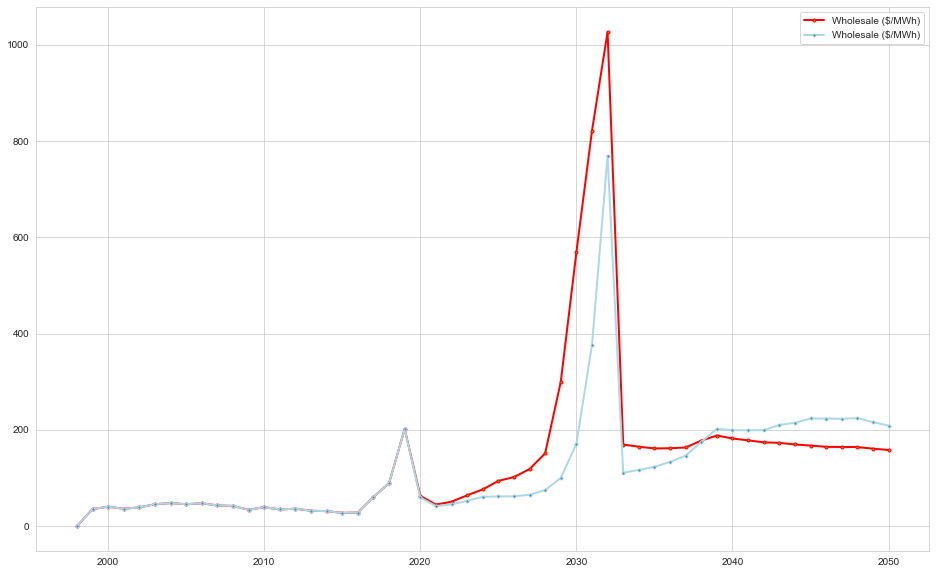

In [21]:
plt.figure(figsize=(16,10))
#xfmt = mdates.DateFormatter('%Y-%m-%d')
#axes.xaxis.set_major_formatter(xfmt)

dataCol = 'Wholesale ($/MWh)'
#dataCol = 'System Production Primary Spot'
#dataCol = 'System Production Rooftop PV'
#dataCol = 'Avg Tariff (c/KWh) per household'
#dataCol = 'Percentage Renewable Production'
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in vicFuture_yearly_bau_results_df.index]

plt.plot( yearly_dates, dataCol, data=vicFuture_yearly_bau_results_df, marker='o', markerfacecolor='darkgoldenrod', markersize=3, color='red', linewidth=2)
plt.plot( yearly_dates,dataCol, data=yearly_bau_results_df, marker='o', markerfacecolor='steelblue', markersize=3, color='lightblue', linewidth=2)

#plt.plot( yearly_dates, 'Hist_GHGE_MtCO2e', data=historic_and_simul_emissions_df, color='burlywood', linewidth=4)
#plt.plot( yearly_dates,'Simulated_GHGE_VIC (MtCO2e)', data=historic_and_simul_emissions_df, color='lightblue', linewidth=4)

#plt.xlabel('Years')
#plt.ylabel('MtCO2-e')
plt.legend()

### Validation with Percentage difference

### Validation with Percentage difference

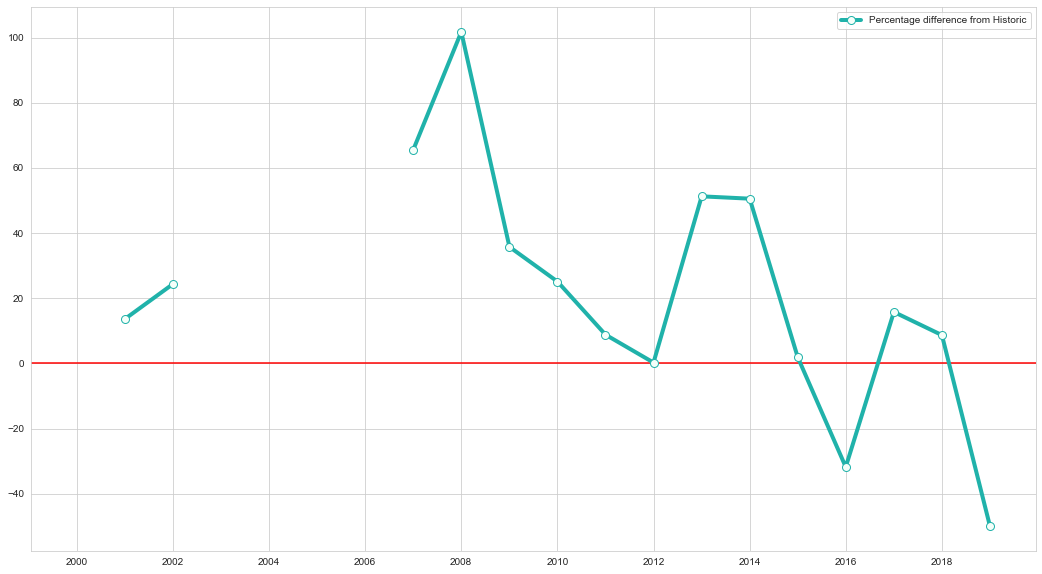

In [36]:
plt.figure(figsize=(18,10))
#xfmt = mdates.DateFormatter('%Y-%m-%d')
#axes.xaxis.set_major_formatter(xfmt)
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in historic_and_simul_tariff_df.index]

plt.axhline(y=0.0, color='r', linestyle='-')
plt.plot( yearly_dates, difference_tariffs, marker='o', 
         markerfacecolor='mintcream', markersize=8, color='lightseagreen', 
         linewidth=4, label='Percentage difference from Historic')


plt.legend()

# Validation Second Phase: Public regime

The second phase of the electricity system in Victoria started in 1920, when the State Electricity Commision (SECV) is created. SECV is a public corporation that had the monopoly of all the activities related to the generation and supply of electricity. After a process of corporatisation and privatisation, its responsibilities for the whole sector ceased at the end of 1994. There is limited data in some parts of this period of analysis. Filling the gaps with some interpolations and informed assumptions, data on tariffs, generation information (fuel, technology type, nameplate capacities, etc), demand, and population was gathered. With this data, tariffs adjusted for 2019 CPI can be visualised from 1920 until 1994. As well as GHGE are quantified in the model from 1926 to 1994. 
The following cells show results the results.

In [82]:
yearly_bau_results_public_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_seed_1602843717281.csv', index_col='Time (Year)')
yearly_bau_results_public_df.head()

,Consumption (KWh) per household,Avg Tariff (c/KWh) per household,Wholesale ($/MWh),GHG Emissions (tCO2-e) per household,Number of Domestic Consumers (households),Percentage Renewable Production,System Production Primary Spot,System Production Secondary Spot,System Production Off Spot,System Production Rooftop PV,...,134 - Brown Coal - Yallourn W - 375.0 - S - 1982 - 2031 - Primary,135 - Brown Coal - Yallourn W - 375.0 - S - 1982 - 2032 - Primary,136 - Brown Coal - Loy Yang A Power Station - 560.0 - S - 1984 - 2048 - Primary,137 - Brown Coal - Loy Yang A Power Station - 530.0 - S - 1986 - 2048 - Primary,138 - Brown Coal - Loy Yang A Power Station - 560.0 - S - 1987 - 2048 - Primary,139 - Brown Coal - Loy Yang A Power Station - 560.0 - S - 1989 - 2048 - Primary,148 - Brown Coal - Loy Yang B Power Station - 500.0 - S - 1993 - 2047 - Primary,149 - Brown Coal - Loy Yang B Power Station - 500.0 - S - 1993 - 2047 - Primary,150 - Landfill Methane / Landfill Gas - Broadmeadows - 6.18 - NS - 1993 - 2029 - OffSpot,151 - Brown Coal - Morwell Power Station Energy Brix - 165.0 - S - 1993 - 1996 - Primary
Time (Year),,,,,,,,,,,,,,,,,,,,,
1920,0.0,150.156509,0.0,NaN,65012.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,0.0,165.770996,0.0,NaN,72890.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1922,0.0,213.556015,0.0,NaN,100671.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923,0.0,206.728500,0.0,NaN,107842.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924,0.0,198.639999,0.0,0.0,112784.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


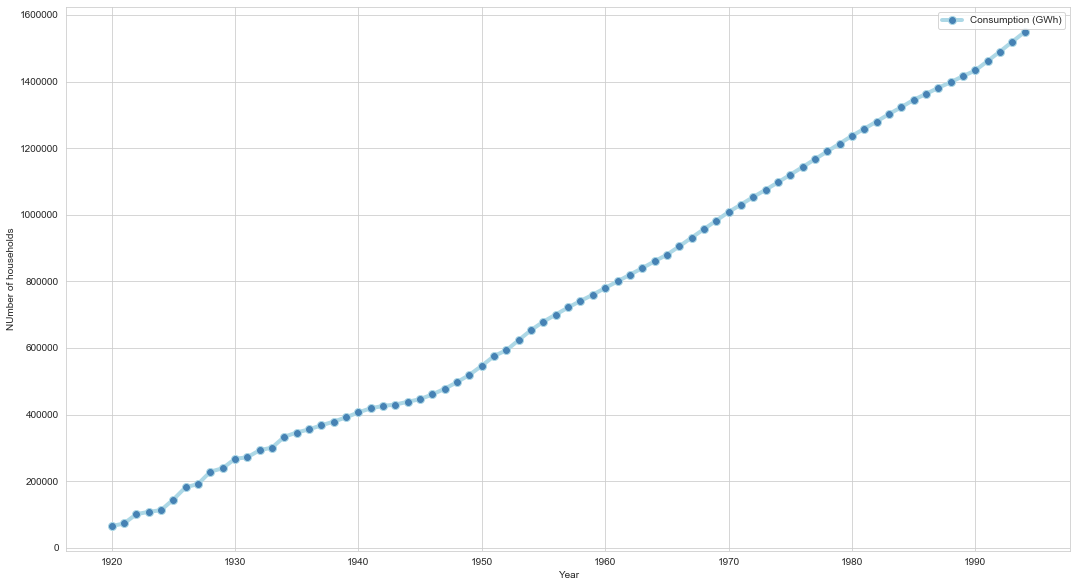

In [83]:
plt.figure(figsize=(18,10))
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in yearly_bau_results_public_df.index]
data=yearly_bau_results_public_df
plt.plot( yearly_dates,data['Number of Domestic Consumers (households)'], marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4, label='Consumption (GWh)')

plt.xlabel('Year')
plt.ylabel('NUmber of households')
plt.legend()

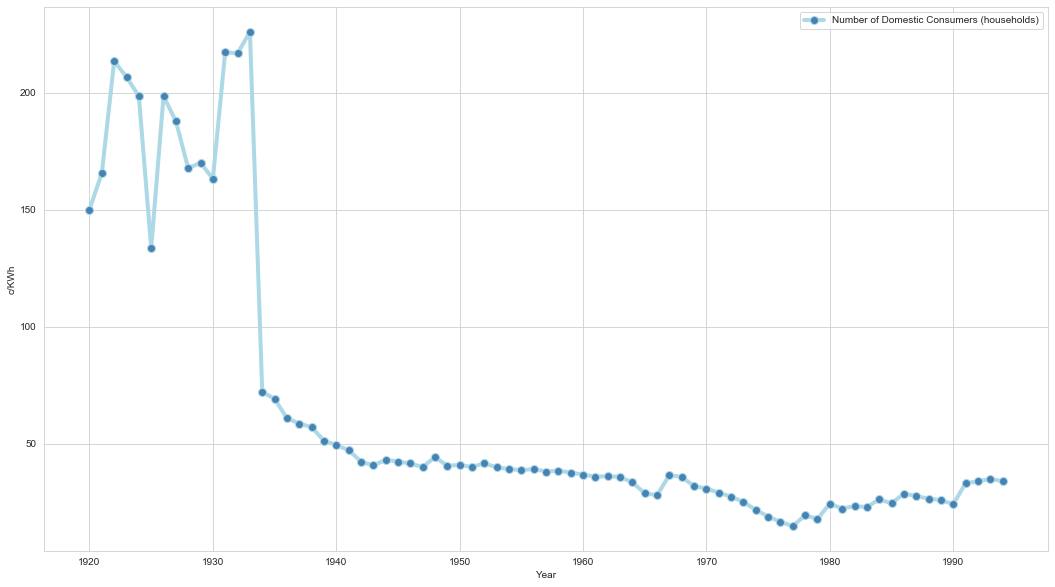

In [84]:
plt.figure(figsize=(18,10))
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in yearly_bau_results_public_df.index]
data=yearly_bau_results_public_df
plt.plot( yearly_dates, data['Avg Tariff (c/KWh) per household'], marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4, label='Number of Domestic Consumers (households)')


plt.xlabel('Year')
plt.ylabel('c/KWh')
plt.legend()

In [85]:
# total consumption in Victoria
data_consumption_total = (data['Consumption (KWh) per household'] * data['Number of Domestic Consumers (households)']) / 1000000.0 /0.3


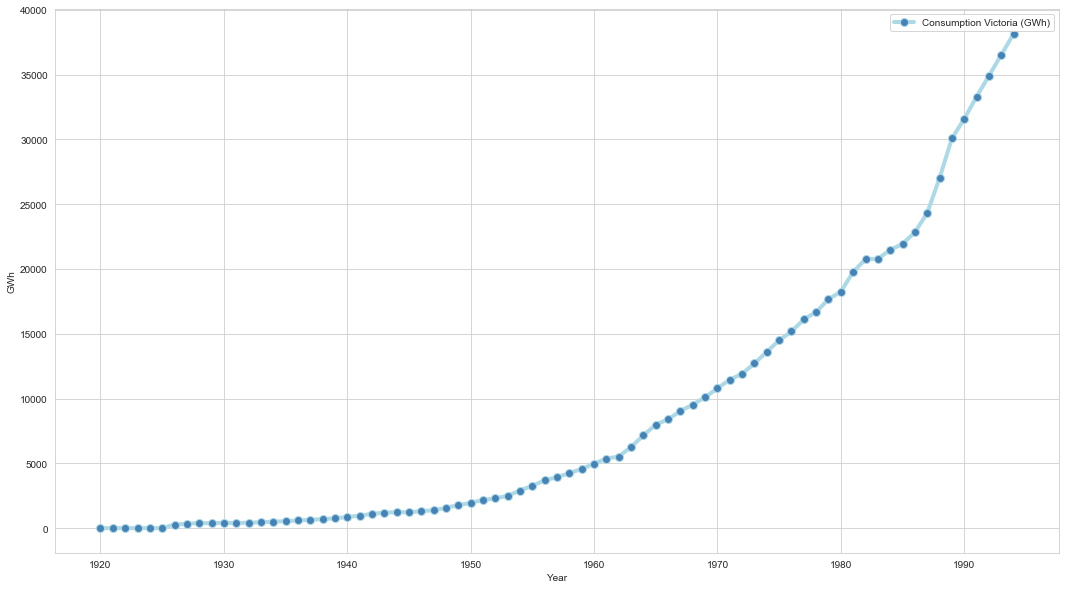

In [86]:
plt.figure(figsize=(18,10))
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in yearly_bau_results_public_df.index]
data=yearly_bau_results_public_df
plt.plot( yearly_dates,data_consumption_total, marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4, label='Consumption Victoria (GWh)')

plt.xlabel('Year')
plt.ylabel('GWh')
plt.legend()

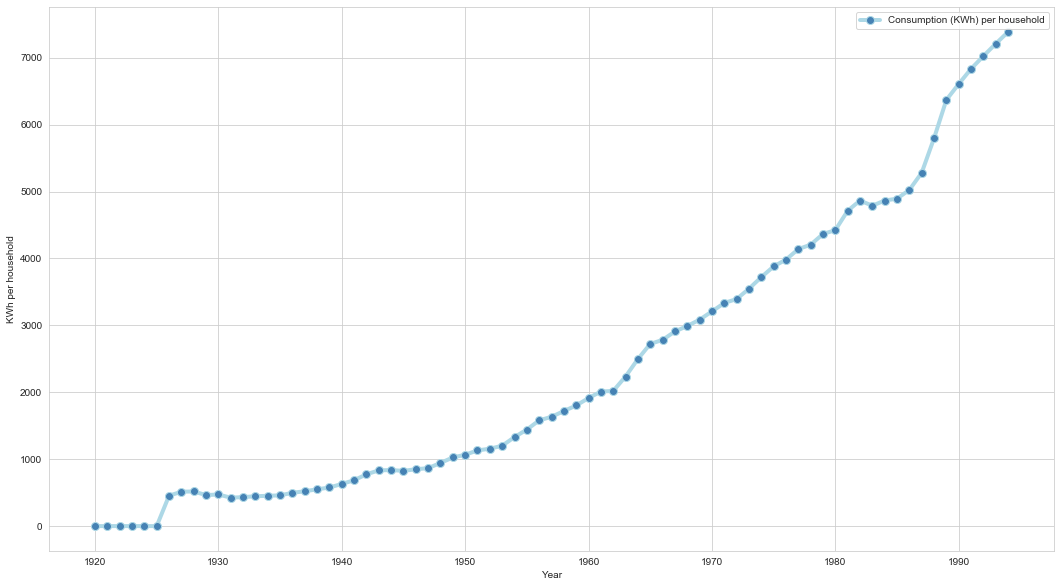

In [87]:
plt.figure(figsize=(18,10))
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in yearly_bau_results_public_df.index]
data=yearly_bau_results_public_df
plt.plot( yearly_dates, data['Consumption (KWh) per household'], marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4, label='Consumption (KWh) per household')

plt.xlabel('Year')
plt.ylabel('KWh per household')
plt.legend()

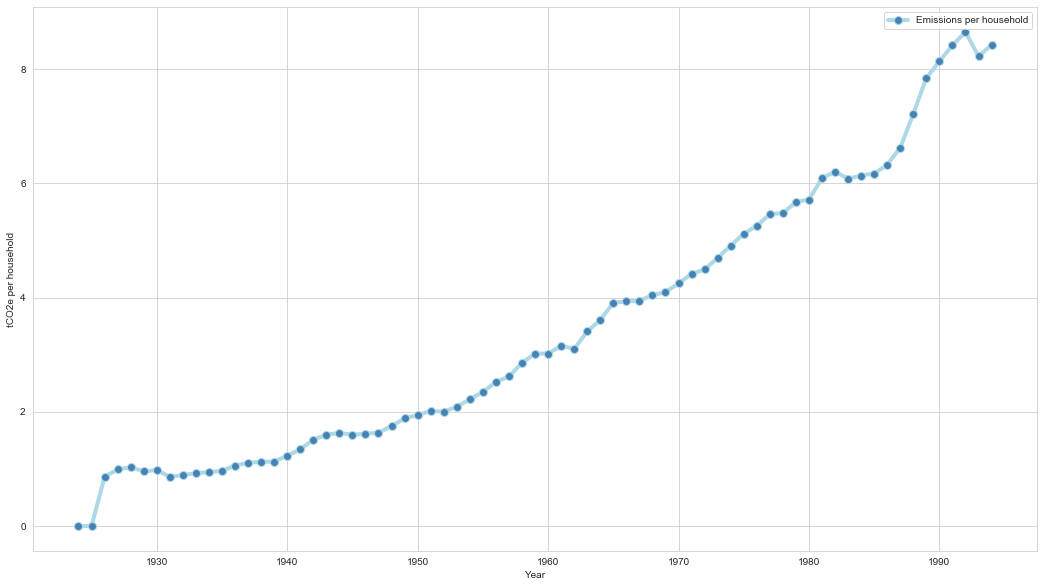

In [91]:
plt.figure(figsize=(18,10))
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in yearly_bau_results_public_df.index]
data=yearly_bau_results_public_df
plt.plot( yearly_dates, data['GHG Emissions (tCO2-e) per household'], marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4, label='Emissions per household')

plt.xlabel('Year')
plt.ylabel('tCO2e per household')
plt.legend()

In [89]:
# total GHGE in Victoria
data_GHG_residential = (data['GHG Emissions (tCO2-e) per household'] * data['Number of Domestic Consumers (households)']) / 1000000.0
data_GHG_total = data_GHG_residential / 0.27


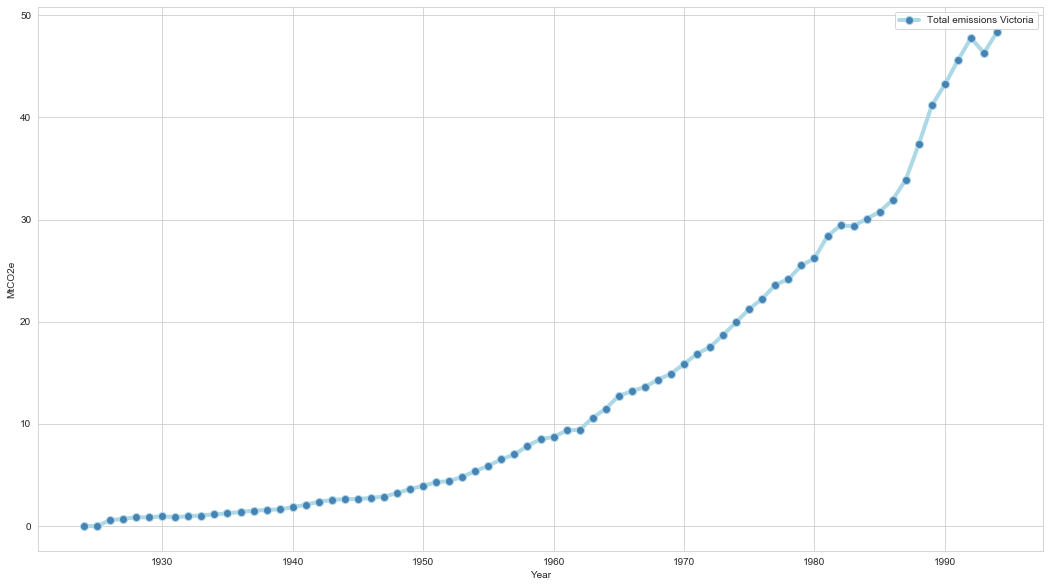

In [92]:
plt.figure(figsize=(18,10))
yearly_dates = [DT.datetime.strptime(str(int(date)),'%Y') for date in yearly_bau_results_public_df.index]
data=yearly_bau_results_public_df
plt.plot( yearly_dates, data_GHG_total, marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4, label='Total emissions Victoria')

plt.xlabel('Year')
plt.ylabel('MtCO2e')
plt.legend()